In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('train_fresh.xls')

In [4]:
data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [5]:
data.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [6]:
data.isnull().sum()

Product_Identifier                   0
Supermarket_Identifier               0
Product_Supermarket_Identifier       0
Product_Weight                     802
Product_Fat_Content                  0
Product_Shelf_Visibility             0
Product_Type                         0
Product_Price                        0
Supermarket_Opening_Year             0
Supermarket _Size                 1450
Supermarket_Location_Type            0
Supermarket_Type                     0
Product_Supermarket_Sales            0
dtype: int64

In [7]:
data['Product_Weight'].fillna(data.groupby('Product_Fat_Content')['Product_Weight'].transform('mean'), inplace = True)

In [8]:
data.isnull().sum()

Product_Identifier                   0
Supermarket_Identifier               0
Product_Supermarket_Identifier       0
Product_Weight                       0
Product_Fat_Content                  0
Product_Shelf_Visibility             0
Product_Type                         0
Product_Price                        0
Supermarket_Opening_Year             0
Supermarket _Size                 1450
Supermarket_Location_Type            0
Supermarket_Type                     0
Product_Supermarket_Sales            0
dtype: int64

In [9]:
train_test_split = [data]
supermarket_size = {'High': 2,'Medium': 1,'Small':0}
for dataset in train_test_split:
    dataset['Supermarket _Size'] =dataset['Supermarket _Size'].map(supermarket_size)

In [10]:
data['Supermarket _Size'].fillna(data.groupby('Product_Type')['Supermarket _Size'].transform('median'), inplace = True)

In [11]:
data.head(2)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,1.0,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,2.0,Cluster 3,Supermarket Type1,6381.69


In [12]:
data['f'] = data.Product_Weight.astype(object)

In [13]:
data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,f
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,1.0,Cluster 3,Grocery Store,709.08,11.6
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,2.0,Cluster 3,Supermarket Type1,6381.69,11.6
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,1.0,Cluster 2,Supermarket Type1,6381.69,11.6
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,1.0,Cluster 3,Supermarket Type2,2127.23,11.6
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,0.0,Cluster 2,Supermarket Type1,2481.77,11.6


In [14]:
data['f'] = data['f'].astype(str)

In [15]:
data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,f
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,1.0,Cluster 3,Grocery Store,709.08,11.6
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,2.0,Cluster 3,Supermarket Type1,6381.69,11.6
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,1.0,Cluster 2,Supermarket Type1,6381.69,11.6
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,1.0,Cluster 3,Supermarket Type2,2127.23,11.6
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,0.0,Cluster 2,Supermarket Type1,2481.77,11.6


In [16]:
data.dtypes

Product_Identifier                 object
Supermarket_Identifier             object
Product_Supermarket_Identifier     object
Product_Weight                    float64
Product_Fat_Content                object
Product_Shelf_Visibility          float64
Product_Type                       object
Product_Price                     float64
Supermarket_Opening_Year            int64
Supermarket _Size                 float64
Supermarket_Location_Type          object
Supermarket_Type                   object
Product_Supermarket_Sales         float64
f                                  object
dtype: object

In [17]:
data['f'] = data['f'].apply(lambda x: x.split('.')[0])

In [18]:
data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,f
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,1.0,Cluster 3,Grocery Store,709.08,11
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,2.0,Cluster 3,Supermarket Type1,6381.69,11
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,1.0,Cluster 2,Supermarket Type1,6381.69,11
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,1.0,Cluster 3,Supermarket Type2,2127.23,11
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,0.0,Cluster 2,Supermarket Type1,2481.77,11


In [19]:
data['f'] = data['f'].astype(float)

In [20]:
data['b'] =  data['Product_Weight'] - data['f']

In [21]:
data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,f,b
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,1.0,Cluster 3,Grocery Store,709.08,11.0,0.6
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,2.0,Cluster 3,Supermarket Type1,6381.69,11.0,0.6
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,1.0,Cluster 2,Supermarket Type1,6381.69,11.0,0.6
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,1.0,Cluster 3,Supermarket Type2,2127.23,11.0,0.6
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,0.0,Cluster 2,Supermarket Type1,2481.77,11.0,0.6


In [22]:
data.drop(['Product_Supermarket_Identifier','Product_Identifier','Supermarket_Identifier','f'], axis =1, inplace = True)

In [23]:
data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,b
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,1.0,Cluster 3,Grocery Store,709.08,0.6
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,2.0,Cluster 3,Supermarket Type1,6381.69,0.6
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,1.0,Cluster 2,Supermarket Type1,6381.69,0.6
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,1.0,Cluster 3,Supermarket Type2,2127.23,0.6
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,0.0,Cluster 2,Supermarket Type1,2481.77,0.6


In [24]:
data['a'] = data['Product_Price'].astype(str)

In [25]:
data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,b,a
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,1.0,Cluster 3,Grocery Store,709.08,0.6,357.54
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,2.0,Cluster 3,Supermarket Type1,6381.69,0.6,355.79
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,1.0,Cluster 2,Supermarket Type1,6381.69,0.6,350.79
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,1.0,Cluster 3,Supermarket Type2,2127.23,0.6,355.04
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,0.0,Cluster 2,Supermarket Type1,2481.77,0.6,354.79


In [26]:
data['f'] = data['a'].apply(lambda x: x.split('.')[0])

In [27]:
data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,b,a,f
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,1.0,Cluster 3,Grocery Store,709.08,0.6,357.54,357
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,2.0,Cluster 3,Supermarket Type1,6381.69,0.6,355.79,355
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,1.0,Cluster 2,Supermarket Type1,6381.69,0.6,350.79,350
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,1.0,Cluster 3,Supermarket Type2,2127.23,0.6,355.04,355
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,0.0,Cluster 2,Supermarket Type1,2481.77,0.6,354.79,354


In [28]:
data['f'] = data['f'].astype(float)

In [29]:
data['d'] =  data['Product_Price'] - data['f']

In [30]:
data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,b,a,f,d
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,1.0,Cluster 3,Grocery Store,709.08,0.6,357.54,357.0,0.54
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,2.0,Cluster 3,Supermarket Type1,6381.69,0.6,355.79,355.0,0.79
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,1.0,Cluster 2,Supermarket Type1,6381.69,0.6,350.79,350.0,0.79
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,1.0,Cluster 3,Supermarket Type2,2127.23,0.6,355.04,355.0,0.04
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,0.0,Cluster 2,Supermarket Type1,2481.77,0.6,354.79,354.0,0.79


In [31]:
data.drop(['a','f'],axis = 1, inplace = True)

In [32]:
data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,b,d
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,1.0,Cluster 3,Grocery Store,709.08,0.6,0.54
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,2.0,Cluster 3,Supermarket Type1,6381.69,0.6,0.79
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,1.0,Cluster 2,Supermarket Type1,6381.69,0.6,0.79
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,1.0,Cluster 3,Supermarket Type2,2127.23,0.6,0.04
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,0.0,Cluster 2,Supermarket Type1,2481.77,0.6,0.79


In [33]:
dumm1 = pd.get_dummies(data['Product_Fat_Content'])
dumm2 = pd.get_dummies(data['Supermarket_Location_Type'])
dumm3 = pd.get_dummies(data['Supermarket_Type'])

In [34]:
data.drop(['Supermarket_Location_Type','Product_Fat_Content','Supermarket_Type','Product_Type'],axis = 1, inplace = True)

In [35]:
data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Product_Supermarket_Sales,b,d
0,11.6,0.068535,357.54,2005,1.0,709.08,0.6,0.54
1,11.6,0.040912,355.79,1994,2.0,6381.69,0.6,0.79
2,11.6,0.041178,350.79,2014,1.0,6381.69,0.6,0.79
3,11.6,0.041113,355.04,2016,1.0,2127.23,0.6,0.04
4,11.6,0.000000,354.79,2011,0.0,2481.77,0.6,0.79


In [36]:
data = pd.concat([data,dumm1,dumm2,dumm3],axis = 1)

In [37]:
data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Product_Supermarket_Sales,b,d,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,11.6,0.068535,357.54,2005,1.0,709.08,0.6,0.54,1,0,0,0,0,1,1,0,0,0
1,11.6,0.040912,355.79,1994,2.0,6381.69,0.6,0.79,1,0,0,0,0,1,0,1,0,0
2,11.6,0.041178,350.79,2014,1.0,6381.69,0.6,0.79,1,0,0,0,1,0,0,1,0,0
3,11.6,0.041113,355.04,2016,1.0,2127.23,0.6,0.04,1,0,0,0,0,1,0,0,1,0
4,11.6,0.000000,354.79,2011,0.0,2481.77,0.6,0.79,0,0,1,0,1,0,0,1,0,0


In [38]:
data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Product_Supermarket_Sales,b,d,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,11.6,0.068535,357.54,2005,1.0,709.08,0.6,0.54,1,0,0,0,0,1,1,0,0,0
1,11.6,0.040912,355.79,1994,2.0,6381.69,0.6,0.79,1,0,0,0,0,1,0,1,0,0
2,11.6,0.041178,350.79,2014,1.0,6381.69,0.6,0.79,1,0,0,0,1,0,0,1,0,0
3,11.6,0.041113,355.04,2016,1.0,2127.23,0.6,0.04,1,0,0,0,0,1,0,0,1,0
4,11.6,0.000000,354.79,2011,0.0,2481.77,0.6,0.79,0,0,1,0,1,0,0,1,0,0


In [39]:
data.to_csv('mr_data.csv')

In [40]:
X = data.drop('Product_Supermarket_Sales',axis =1)

In [41]:
y = data['Product_Supermarket_Sales']

In [42]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from xgboost import XGBRegressor

In [45]:
model1 = XGBRegressor()

In [46]:
model1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [47]:
prediction1 = model1.predict(X_test)

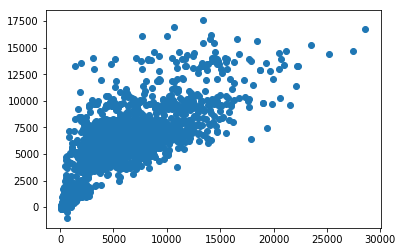

In [48]:
plt.scatter(y_test,prediction1)

In [49]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(model1,X_test,y_test,cv =10)

In [50]:
print(score.mean()*100)

52.485314091606284


In [51]:
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [52]:
params = {
        'gamma': [0.5,0.3, 1, 1.5, 2, 5],
        'learning_rate' :[0.1,0.2,0.001]
        }

In [53]:
grid = GridSearchCV( XGBRegressor() , params, verbose =  3  )

In [54]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.561654 -   0.8s
[CV] gamma=0.5, learning_rate=0.1 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.540792 -   0.5s
[CV] gamma=0.5, learning_rate=0.1 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.538457 -   0.3s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.536892 -   0.3s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.512584 -   0.3s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.515463 -   0.5s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-1.377118 -   0.6s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-1.500202 -   0.2s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-1.417128 -   0.2s
[CV] gamma=0.3, learning_rate=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   25.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.5, 0.3, 1, 1.5, 2, 5], 'learning_rate': [0.1, 0.2, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [55]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [56]:
gri = grid.predict(X_test)

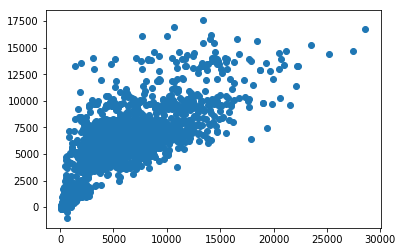

In [57]:
plt.scatter(y_test,gri)

In [58]:
test = pd.read_csv('gbefun.csv')

In [59]:
test.drop('Unnamed: 0',axis = 1, inplace = True)


In [60]:
test.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,b,d,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,8.270,0.214125,459.98,2005,1.0,0.270,0.98,0,1,0,0,0,1,1,0,0,0
1,8.270,0.127821,464.98,1994,2.0,0.270,0.98,0,1,0,0,0,1,0,1,0,0
2,7.390,0.082171,477.38,1994,2.0,0.390,0.38,1,0,0,0,0,1,0,1,0,0
3,6.115,0.011791,472.63,2005,1.0,0.115,0.63,0,1,0,0,0,1,1,0,0,0
4,6.115,0.007038,473.13,1994,2.0,0.115,0.13,0,1,0,0,0,1,0,1,0,0


In [61]:
mypred1 = grid.predict(test)

In [62]:
dat11  =pd.read_csv('submission_price.xls')
dat11.drop('Product_Supermarket_Sales',axis = 1 , inplace = True)
a = pd.DataFrame({'Product_Supermarket_Sales':mypred1})

In [63]:
submitted1 = pd.concat([dat11,a],axis =1)

In [64]:
submitted1.to_csv('kaggle1_it.csv',index = False)

In [65]:
from sklearn import metrics

In [66]:
print(metrics.mean_squared_error(y_test,gri))

8850016.387287602


In [67]:
print(np.sqrt(metrics.mean_squared_error(y_test,gri)))

2974.897710390662


In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model2 = LinearRegression()

In [70]:
model2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
prediction2 = model2.predict(X_test)

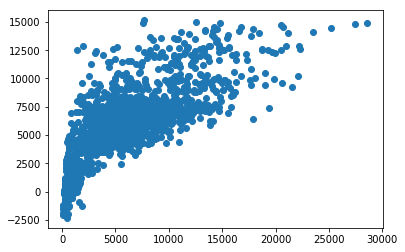

In [72]:
plt.scatter(y_test,prediction2)

In [73]:
from sklearn.cross_validation import cross_val_score
yy = cross_val_score(model2,X_test,y_test,cv =10)

In [74]:
print(yy.mean()*100)

53.805814036287394


In [75]:
mypred2 = model2.predict(test)

In [76]:
dat1  =pd.read_csv('submission_price.xls')
dat1.drop('Product_Supermarket_Sales',axis = 1 , inplace = True)
b = pd.DataFrame({'Product_Supermarket_Sales':mypred2})

In [77]:
submitted = pd.concat([dat1,b],axis =1)

In [78]:
submitted.to_csv('kag.csv',index = False)

In [79]:
from sklearn.neighbors import KNeighborsRegressor

In [80]:
knn = KNeighborsRegressor(n_neighbors= 1)

In [81]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [82]:
pred3 = knn.predict(X_test)

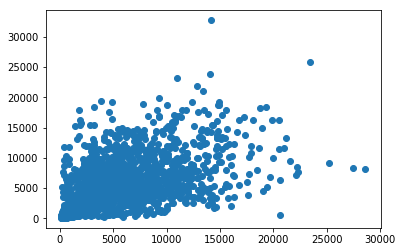

In [83]:
plt.scatter(y_test,pred3)

In [84]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0,0.5,'error')

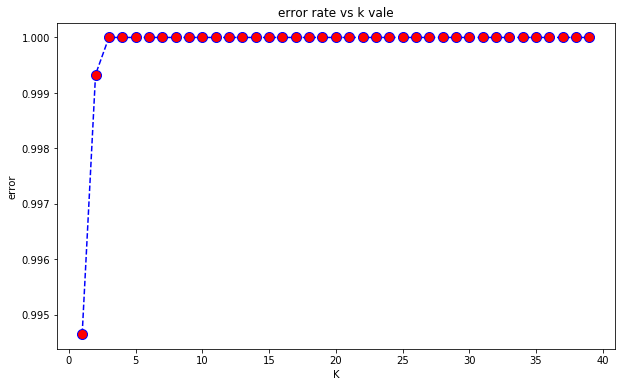

In [85]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = 'dashed', marker  = 'o',
        markerfacecolor = 'red', markersize = 10)
plt.title('error rate vs k vale')
plt.xlabel('K')
plt.ylabel('error')

In [86]:
myed3 = knn.predict(test)

In [87]:
f = pd.DataFrame({'Product_Supermarket_Sales':myed3})

In [88]:
submi = pd.concat([dat1,f],axis =1)

In [89]:
submi.to_csv('kagg1.csv',index = False)

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
rfc = RandomForestRegressor(n_estimators= 1000,random_state=42,max_depth=3)

In [92]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [93]:
plt.scatter(y_test,rfc_pred)

NameError: name 'rfc_pred' is not defined

In [ ]:
peed = rfc.predict(test)

In [ ]:
h = pd.DataFrame({'Product_Supermarket_Sales':peed})

In [ ]:
suooo = pd.concat([dat1,h],axis =1)

In [ ]:
suooo.to_csv('mykag2.csv',index = False)

In [ ]:
from sklearn.grid_search import GridSearchCV

In [ ]:
param_grid = {'n_estimators':[10,20,100,500,1000],
              'max_depth': [1,3,5,10,15,20,25,30],
              'min_samples_leaf': [1,2,4,6,8,10]}

In [ ]:
grid = GridSearchCV( RandomForestRegressor() , param_grid , verbose =  3  )

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_estimator_

In [ ]:
prd = grid.predict(X_test)

In [ ]:
plt.scatter(y_test,prd)

In [ ]:
pee = rfc.predict(test)

In [ ]:
v = pd.DataFrame({'Product_Supermarket_Sales':pee})

In [ ]:
suooo = pd.concat([dat1,v],axis =1)

In [ ]:
suooo.to_csv('mykag3.csv',index = False)